In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import seaborn as sns

# Data Import

In [ ]:
#filepath = r''
#df = pd.read_csv(filepath)

In [ ]:
url=r''
df = pd.read_csv(url)

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


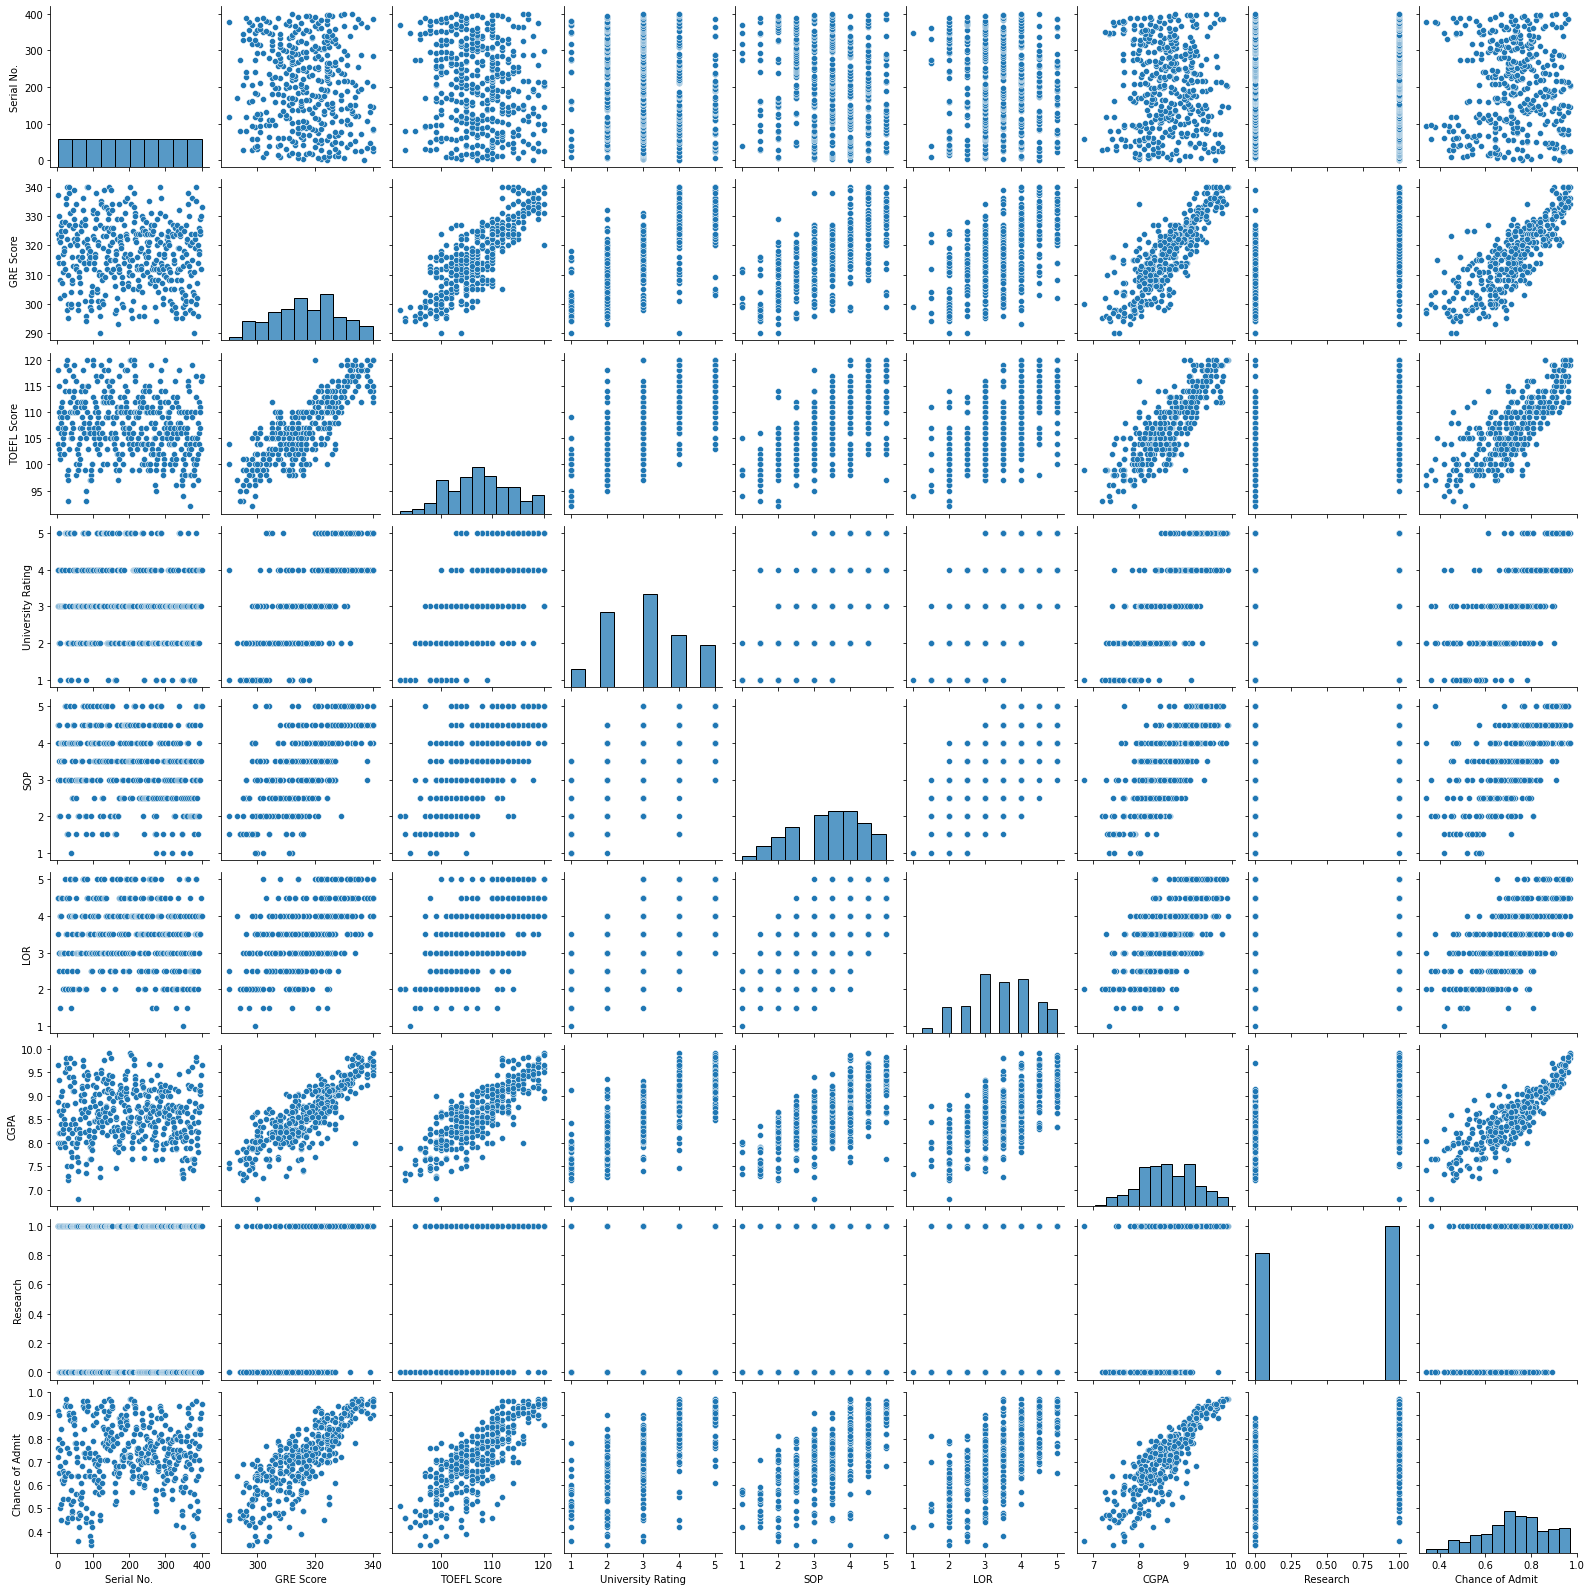

In [ ]:
sns.pairplot(df);

# Defining X and y

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']]

In [ ]:
X = df.drop(['Serial No.','Chance of Admit '], axis = 1)

In [ ]:
y = df['Chance of Admit ']

In [ ]:
X.shape, y.shape

((400, 7), (400,))

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 7), (120, 7), (280,), (120,))

# Modelling

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_ 

array([ 0.00218125,  0.00186885,  0.00505707, -0.00195267,  0.01969362,
        0.12172687,  0.02249086])

In [ ]:
lr.intercept_

-1.3045133972617875

In [ ]:
lr.score(X_train, y_train) # R square

0.7961368363158542

# Testing

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([0.87654337, 0.67997351, 0.74051715, 0.70594156, 0.63683291,
       0.69221074, 0.65547816, 0.84717437, 0.52114872, 0.53572188,
       0.8582789 , 0.82442149, 0.85690427, 0.93747817, 0.67963393,
       0.51643044, 0.84243548, 0.69590094, 0.65610829, 0.71613468,
       0.73197285, 0.88534424, 0.44800195, 0.84816521, 0.64453201,
       0.80781971, 0.835269  , 0.53650541, 0.61612781, 0.52910186,
       0.87532881, 0.65397474, 0.77834034, 0.8371445 , 0.61502585,
       0.64227845, 0.92942005, 0.64484883, 0.77562263, 0.70427729,
       0.88229371, 0.67051701, 0.67560605, 0.62475979, 0.79494776,
       0.64936186, 0.60152633, 0.52400882, 0.62949378, 0.79710437,
       0.75817593, 0.6250011 , 0.78400367, 0.65684464, 0.72384746,
       0.95259601, 0.63158197, 0.70849797, 0.81689963, 0.84801572,
       0.72020548, 0.60883687, 0.62414455, 0.68230071, 0.80795113,
       0.6958391 , 0.9279982 , 0.84082368, 0.92744655, 0.89864004,
       0.88990981, 0.7522745 , 0.68344978, 0.70861471, 0.79862

In [ ]:
y_pred.shape, y_test.shape

((120,), (120,))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mean_absolute_error(y_test, y_pred)

0.04273495833230871

In [ ]:
mean_squared_error(y_test, y_pred)

0.00383048335287116

In [ ]:
r2_score(y_test, y_pred)

0.8160659231312308

# Prediction

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
X_new = np.array((316,	107,	3,	3,	3,	8.5,	0.5))

In [ ]:
X_new.shape

(7,)

In [ ]:
X_new = np.array((316,	107,	3,	3,	3,	8.5,	0.5)).reshape(-1,7) # change the column nos as per nos of feathures

In [ ]:
X_new.shape

(1, 7)

In [ ]:
y_new = lr.predict(X_new)

In [ ]:
y_new

array([0.69904617])